# Thesis pictures
This notebooks contains the code used to produced most of the report images

In [2]:
%reload_ext autoreload
%autoreload 2

import cv2
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from os import path
from utilities.patches import *
from utilities.postprocessing.handlers.functional import read_image

from jupyterthemes import jtplot
jtplot.reset()

plt.style.use(['science', 'ieee'])
# matplotlib.rcParams['figure.figsize'] = (5,4)
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

def hmshow(hm, save_path=None):
    fig = plt.figure(dpi=800)
    plt.tight_layout()
    sns.heatmap(hm, cmap=plt.cm.viridis, vmin=0, vmax=1)
    plt.show()
    if save_path is not None: fig.savefig(save_path, bbox_inches='tight')
    return fig
def hm_name_from_path(hm):
    return path.basename(hm)

def figsave(fig, out_path, ax=None):
    if ax is not None:
        ax.view_init(elev=20, azim=125)

        ax.tick_params(axis = 'both', which = 'major', labelsize = 4, pad=0)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 4, pad=0)
#     plt.show()
    fig.savefig(out_path, bbox_inches='tight', transparent=True)

## Height maps pictures

## 2D

In [2]:
hms = glob.glob('./maps/new-train/*.png')

In [ ]:
out_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/hm/'
name2path = {hm_name_from_path(hm) : hm for hm in hms}

hmshow(hmread(hms[0]) / 255, '{}/{}'.format(out_dir, hm_name_from_path(hms[0])))
for hm in hms:
    hmshow(hmread(hm) / 255, '{}/{}'.format(out_dir, hm_name_from_path(hm)))
    

## 3D

In [3]:
def store_3d(p, outdir, *args, **kwargs):
    p.plot3d_mayavi(0.02, '{}/hm3d/{}'.format(out_dir, hm_name_from_path(hm)), borders=False, *args, **kwargs)
    p.plot3d_mayavi(0.02, '{}/hm3d_borders/{}'.format(out_dir, hm_name_from_path(hm)), borders=True, *args, **kwargs)
    p.plot3d_mayavi(0.02, '{}/hm3d_viridis/{}'.format(out_dir, hm_name_from_path(hm)), borders=True, colormap='viridis', mesh=True, *args, **kwargs)
    del p

In [4]:
from utilities.postprocessing.handlers.functional import read_image
out_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/'
for hm in hms:
    p = Patch.from_path(hm)
    store_3d(p, out_dir,  distance=27)


### viridis

## Quarry

In [5]:
hm = './maps/test/querry-big-10.png'
im = read_image(hm).astype(np.float32) / 255

p = Patch.from_hm(im * 10)

store_3d(p, out_dir, distance=85)
# p.plot3d_mayavi(0.02, size=(2000, 2000), azimuth=45, elevation=45, distance=85, save_path='{}/{}'.format(out_dir, hm_name_from_path(hm)))


# Data aug

In [8]:
out_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/data-aug/'

## Center patch


In [9]:
from utilities.patches import *
from estimators.data.transformations import *
class SquareInTheMiddlePatch(Patch, Mayavi3dPlottable):
    def make(self, size=4, *args, **kwargs):
#         here we can access the .hm filled with zeros
        self.hm[self.shape[0] // 2 - size : self.shape[0] // 2 + size, self.shape[1] // 2 - size: self.shape[0] // 2 + size] = 1
        return self.hm
    
center_p = SquareInTheMiddlePatch((100,100))(size=25)

/home/francesco/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [33]:
center_p = SquareInTheMiddlePatch((100,100))(size=25)
# fig = center_p.plot2d()

# figsave(fig, out_dir +'/2d/square-middle.png', None)
# center_p.plot3d_mayavi(0.02, size=(500, 500), mesh=True,  distance=5,
#                         # colormap='viridis',
#                         azimuth=0,
#                         save_path= out_dir +'/3d/square-middle-mayavi.png',
#                        )


In [20]:
transform = CenterAndScalePatch()

center_p_tr = transform(center_p.hm)
center_p_tr = Patch.from_hm(center_p_tr)

center_p_tr.plot3d_mayavi(0.02, size=(500, 500), mesh=True,  distance=5,
                        # colormap='viridis',
                        azimuth=0,
                        save_path= out_dir +'/3d/square-middle-center-mayavi.png',
                       )

# fig = center_p_tr.plot2d()
# figsave(fig, out_dir +'/2d/square-middle-center.png', None)


## Data-aug

### Simplex noise

In [21]:
random_simplex_noise = RandomSimplexNoise((100,100), n=5)

100%|██████████| 5/5 [00:00<00:00, 19.11it/s]


In [22]:
flat_path = Patch((513,513))

In [23]:
center_p_simplex = Patch.from_hm(im2simplex(flat_path.hm.copy(), feature_size=5, scale=8))

In [26]:
for i in range(1,5):
    center_p_simplex = MyPatch.from_hm(im2simplex(flat_path.hm.copy(), feature_size=10 * (i + 1), scale=8))
#     fig, ax = center_p_simplex.plot3d(rstride=1, cstride=1)
#     figsave(fig out_dir + '/3d/simplex{}.png'.format(i), ax)
    fig = center_p_simplex.plot3d_mayavi(0.02, out_dir + '/3d/simplex{}.png'.format(i))
    

#     fig = plt.gcf()
#     figsave(fig, out_dir + '/3d/simplex{}.png'.format(i), ax)


### Dropout

In [34]:
# wall_p = WallPatch((100,100), size=8)()
wall_p = center_p
wall_p_dp = Patch.from_hm(iaa.Dropout(p=(0.05, 0.1)).augment_image(center_p.hm))

fig = wall_p_dp.plot2d()
figsave(fig, out_dir + '/2d/center-dropout.png')

wall_p_dp.plot3d_mayavi(0.02, size=(500, 500), mesh=True,  distance=5,
                        # colormap='viridis',
                        azimuth=0,
                        save_path= out_dir +'/3d/center-dropout-mayavi.png',
                       )


### Croase Dropout

In [ ]:
# wall_p = WallPatch((100,100), size=8)()
wall_p_dp = Patch.from_hm(iaa.CoarseDropout((0.02, 0.1),size_percent=(0.6, 0.8)).augment_image(wall_p.hm))

fig = wall_p_dp.plot2d()
plt.show()
figsave(fig, out_dir + '/2d/center-coarse-dropout.png')

wall_p_dp.plot3d_mayavi(0.02, size=(500, 500), mesh=True,  distance=5,
                        # colormap='viridis',
                        azimuth=0,
                        save_path= out_dir +'/3d/center-coarse-dropout-mayavi.png',
                       )


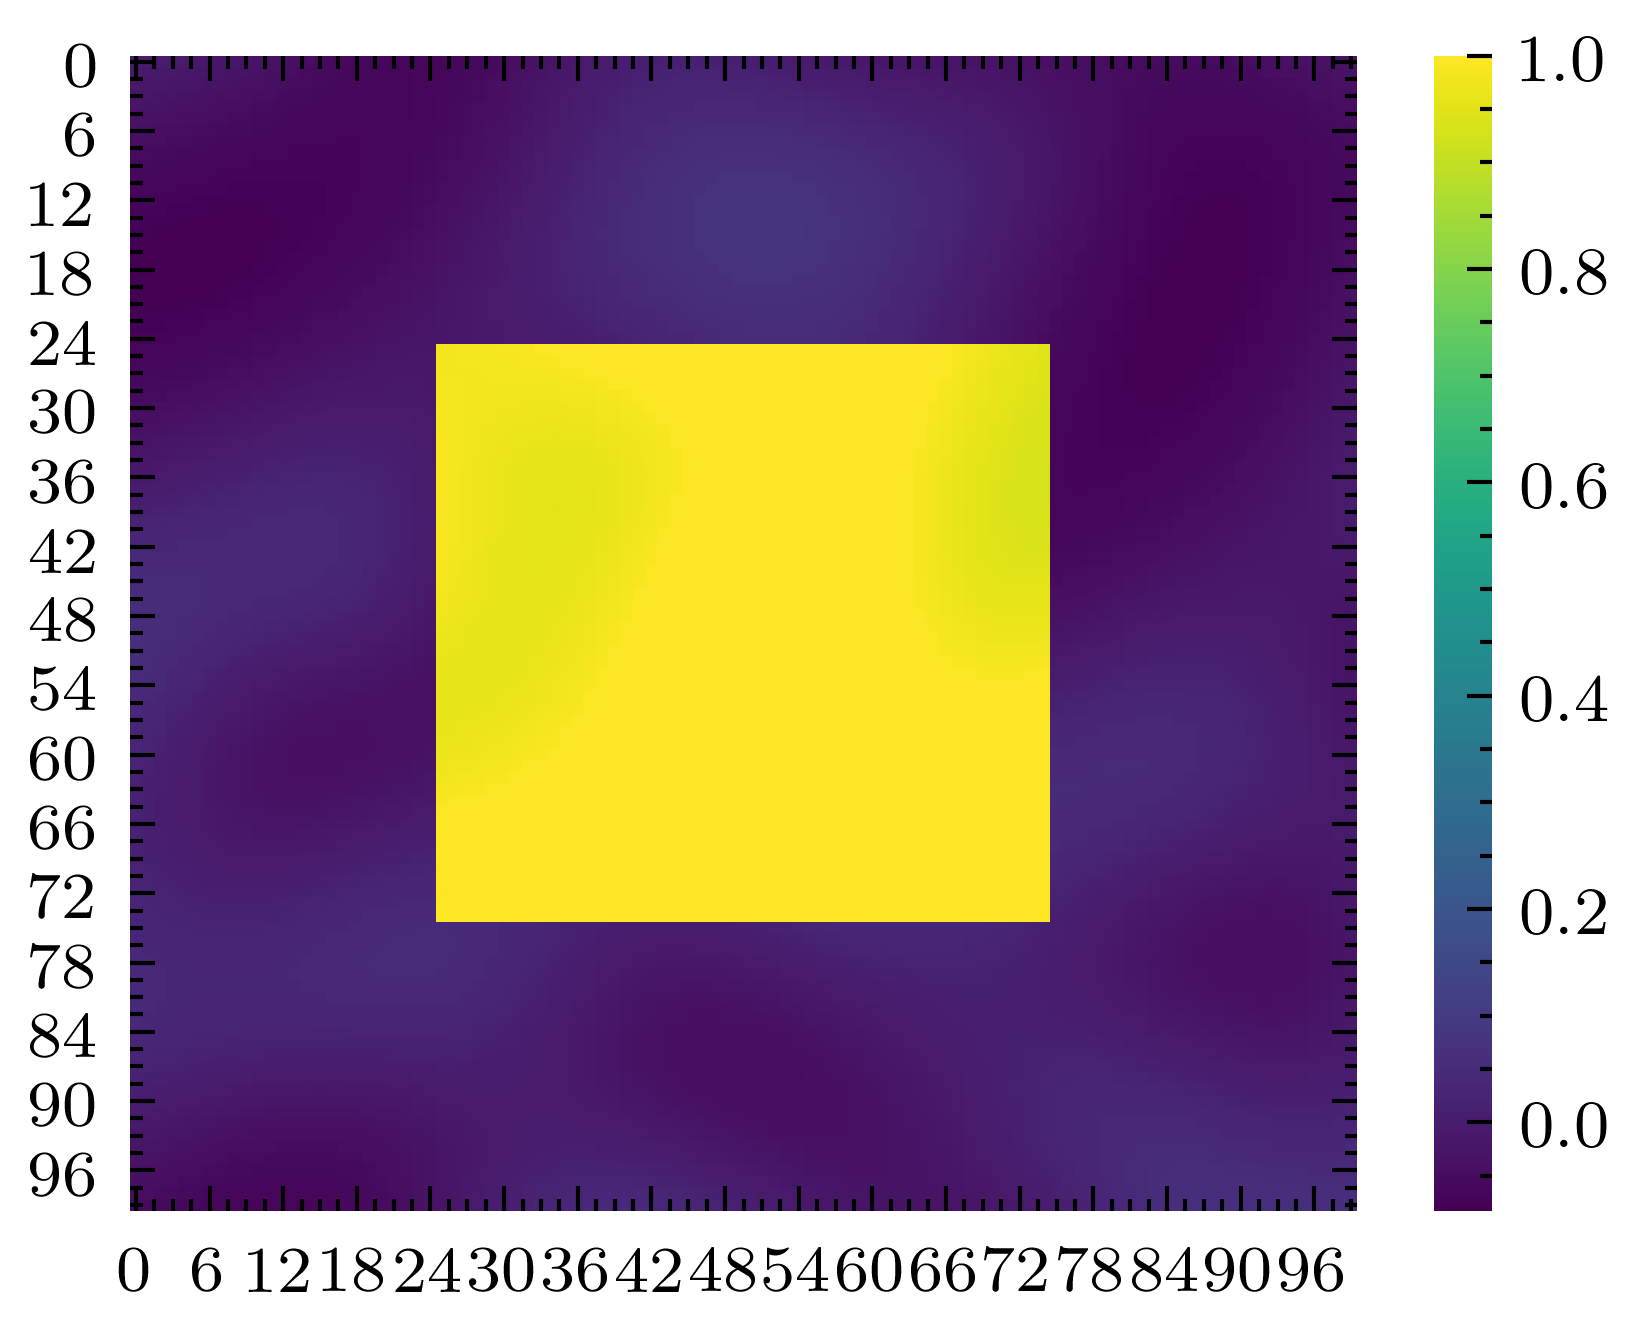

In [37]:
x = Patch.from_hm(im2simplex(center_p.hm.copy(), feature_size=25, scale=10))
fig = x.plot2d()
plt.show()
figsave(fig, out_dir + '/2d/center-simplex.png')


x.plot3d_mayavi(0.02, size=(500, 500), mesh=True,  distance=5,
                        # colormap='viridis',
                        azimuth=0,
                        save_path= out_dir +'/3d/center-simplex.png',
                       )


In [ ]:
x = iaa.Dropout(p=(0.05, 0.1)).augment_image(center_p.hm)
x = iaa.CoarseDropout((0.02, 0.1),size_percent=(0.6, 0.8)).augment_image(x)

x = Patch.from_hm(im2simplex(center_p.hm.copy(), feature_size=25, scale=10))
fig = x.plot2d()
plt.show()
figsave(fig, out_dir + '/2d/center-simplex.png')


x.plot3d_mayavi(0.02, size=(500, 500), mesh=True,  distance=5,
                        # colormap='viridis',
                        azimuth=0,
                        save_path= out_dir +'/3d/center-simplex.png',
                       )


In [ ]:
x = RampPatch((100,100))()

fig = x.plot2d()
figsave(fig, out_dir + '/2d/ramp.png')

x = iaa.Dropout(p=(0.05, 0.1)).augment_image(x.hm)
x = iaa.CoarseDropout((0.02, 0.1),size_percent=(0.6, 0.8)).augment_image(x)
x = im2simplex(x.copy(), scale=8)

x = Patch.from_hm(x)

fig = x.plot2d()
# x.plot3d()

figsave(fig, out_dir + '/2d/ramp-aug.png')

## Spawn

In [ ]:
out_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/3/spawn/'

In [ ]:
from simulation.env.spawn import FlatGroundSpawnStrategy

In [ ]:
spawn_strat = FlatGroundSpawnStrategy('./maps/train/bars1.png')

In [ ]:
flat_pos = spawn_strat.find_spawn_points(40)
fig = spawn_strat.show_spawn_pos(flat_pos)
figsave(fig, out_dir + '/flat-spawn-10.png')

In [ ]:
spawn_pos = spawn_strat.reduce_positions_by_clustering(flat_pos, 20)
fig = spawn_strat.show_spawn_pos(spawn_pos)
figsave(fig, out_dir + '/spawn-10.png')

In [2]:
import glob

In [10]:
def make_subfigure(img_path, make_caption, size):
     return "\begin{{subfigure}}[b]{{}\textwidth}\includegraphics[width=\linewidth]{{}}\end{{subfigure}}".format(size, img_path)


## Generate latex for quarry patches

In [36]:
import glob
ps = sorted(glob.glob('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/quarry/all/best/*.png'))
from os import path

base_dir = '../img/5/quarry/all/best/'
size =0.19

print('\\begin{figure}')
print('\\centering')
for s in ps:
    print('\\begin{{subfigure}}[b]{{{}\\textwidth}}'.format(size))
    print('\\includegraphics[width=\linewidth]{{{}}}'.format(base_dir + path.basename(s)))
    print('\\caption{{${}$cm}}'.format(path.basename(s)[0:2]))
    print('\\end{subfigure}')
    
print('\\end{figure}')


\begin{figure}
\centering
\begin{subfigure}[b]{0.19\textwidth}
\includegraphics[width=\linewidth]{../img/5/quarry/all/best/35-patch-3d-majavi-colormap-0.png}
\caption{$35$cm}
\end{subfigure}
\begin{subfigure}[b]{0.19\textwidth}
\includegraphics[width=\linewidth]{../img/5/quarry/all/best/38-patch-3d-majavi-colormap-1.png}
\caption{$38$cm}
\end{subfigure}
\begin{subfigure}[b]{0.19\textwidth}
\includegraphics[width=\linewidth]{../img/5/quarry/all/best/44-patch-3d-majavi-colormap-2.png}
\caption{$44$cm}
\end{subfigure}
\begin{subfigure}[b]{0.19\textwidth}
\includegraphics[width=\linewidth]{../img/5/quarry/all/best/45-patch-3d-majavi-colormap-3.png}
\caption{$45$cm}
\end{subfigure}
\begin{subfigure}[b]{0.19\textwidth}
\includegraphics[width=\linewidth]{../img/5/quarry/all/best/49-patch-3d-majavi-colormap-4.png}
\caption{$49$cm}
\end{subfigure}
\begin{subfigure}[b]{0.19\textwidth}
\includegraphics[width=\linewidth]{../img/5/quarry/all/best/51-patch-3d-majavi-colormap-5.png}
\caption{$51$cm}


In [27]:
import glob

class PatchesLatexFigure():
    def __init__(self, images_paths, advancements):
        self.images_paths = images_paths
        self.advancements = advancements
    def __call__(self, base_dir, total=None, rows=1, label=None):
    #     ps.reverse()
        from os import path

        base_dir = base_dir
        size = 0.96  / total * rows
        skip_every = 1 if total is None else len(self.images_paths) // 20
#         print('[INFO] skipping every = {}'.format(skip_every))
        ps = self.images_paths[::skip_every]
        advs = self.advancements[::skip_every]
        print('\\begin{figure}[H]')
        print('\\centering')
        for i, s in enumerate(ps):
            print('\\begin{{subfigure}}[b]{{{:.3f}\\linewidth}}'.format(size))
            print('\\includegraphics[width=\linewidth]{{{}}}'.format(base_dir + path.basename(s)))
            if self.advancements:
                print('\\caption{{{:.2f}cm}}'.format(advs[i]))
                if label is not None: print('\\label{{fig : {}-{}}}'.format(label, i))

            print('\\end{subfigure}')
        
        if label is not None: print('\\label{{fig : {}}}'.format(label))
        print('\\end{figure}')
        
    @classmethod
    def from_meta_path(cls, meta_path):
        meta = pd.read_csv(meta_path)
        return cls.from_meta(meta)
        
    @classmethod
    def from_meta(cls, meta):
        meta = meta.sort_values('advancement')
        return cls(list(meta['images']), list(meta['advancement']))
        


# ps = sorted(glob.glob('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/custom_patches/walls_front/all/*.png'))
# make_figure_from_paths(ps[::5])

### Quarry best

In [29]:
fig = PatchesLatexFigure.from_meta_path('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/quarry/best/meta.csv')
fig('../img/5/quarry/best/', total=20, rows=4, label='quarry-best')

\begin{figure}[H]
\centering
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/best/20-patch-3d-majavi-colormap-0.png}
\caption{0.20cm}
\label{fig : quarry-best-0}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/best/25-patch-3d-majavi-colormap-10.png}
\caption{0.26cm}
\label{fig : quarry-best-1}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/best/30-patch-3d-majavi-colormap-20.png}
\caption{0.30cm}
\label{fig : quarry-best-2}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/best/34-patch-3d-majavi-colormap-30.png}
\caption{0.35cm}
\label{fig : quarry-best-3}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/best/38-patch-3d-majavi-colormap-40.png}
\caption{0.38cm}
\label{fig : quarry-best-4}
\end{subfigure}
\begin{subfigure}

In [24]:
fig = PatchesLatexFigure.from_meta_path('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/quarry/worst/meta.csv')
fig('../img/5/quarry/worst/', total=20, rows=4)

\begin{figure}[H]
\centering
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/worst/-35-patch-3d-majavi-colormap-0.png}
\caption{-0.36cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/worst/-7-patch-3d-majavi-colormap-10.png}
\caption{-0.08cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/worst/-4-patch-3d-majavi-colormap-20.png}
\caption{-0.05cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/worst/-3-patch-3d-majavi-colormap-30.png}
\caption{-0.03cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/worst/-2-patch-3d-majavi-colormap-40.png}
\caption{-0.02cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/worst/-1-patch-3d-majavi-colormap-50.png}
\caption{-0.01c

In [25]:
fig = PatchesLatexFigure.from_meta_path('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/quarry/false_negative/meta.csv')
fig('../img/5/quarry/false_negative/', total=20, rows=4)

\begin{figure}[H]
\centering
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_negative/-14-patch-3d-majavi-colormap-0.png}
\caption{-0.14cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_negative/-6-patch-3d-majavi-colormap-10.png}
\caption{-0.07cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_negative/-4-patch-3d-majavi-colormap-20.png}
\caption{-0.05cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_negative/-2-patch-3d-majavi-colormap-30.png}
\caption{-0.02cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_negative/00-patch-3d-majavi-colormap-40.png}
\caption{-0.00cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_negati

In [26]:
fig = PatchesLatexFigure.from_meta_path('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/quarry/false_positive/meta.csv')
fig('../img/5/quarry/false_positive/', total=20, rows=4)

\begin{figure}[H]
\centering
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_positive/20-patch-3d-majavi-colormap-0.png}
\caption{0.20cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_positive/20-patch-3d-majavi-colormap-12.png}
\caption{0.21cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_positive/22-patch-3d-majavi-colormap-24.png}
\caption{0.22cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_positive/23-patch-3d-majavi-colormap-36.png}
\caption{0.23cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_positive/24-patch-3d-majavi-colormap-48.png}
\caption{0.24cm}
\end{subfigure}
\begin{subfigure}[b]{0.192\linewidth}
\includegraphics[width=\linewidth]{../img/5/quarry/false_positive/25-

In [ ]:
fig = PatchesLatexFigure.from_meta_path('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/quarry/worst/meta.csv')
fig('../img/5/quarry/worst/', total=20, rows=5)

## Image from above
use in section 2

In [12]:
hm = '/home/francesco/Documents/Master-Thesis/core/maps/new-train/bumps0.png'
im = read_image(hm).astype(np.float32) / 255

p = Patch.from_hm(im)
p.plot3d_mayavi(0.02, size=(1000, 1000), azimuth=0, elevation=0, distance=20, save_path='/home/francesco/Desktop/bumps0_above.png')


<mayavi.modules.surface.Surface object at 0x7f8770154990> None


In [7]:
class MyPatch(Patch):

    @classmethod
    def from_df(cls, df, how_many, patches_dir):
        skip = len(df) // how_many
        patches = []
        for idx, row in df[::skip].iterrows():
            fig = plt.figure()
            p = cls.from_path(patches_dir + '/' + row['images'])
            p.row = row
            patches.append(p)
        return patches


## Crop

In [ ]:
patches_dir = '/media/francesco/saetta/krock-dataset/crop/100/patches'
df = pd.read_csv('/media/francesco/saetta/krock-dataset/crop/100/csvs/test.csv')
patches = MyPatch.from_df(df, 1, patches_dir)
for i, p in enumerate(patches):
    # p.plot2d().savefig('{}/2d/{}-{}.png'.format(out_dir, i, p.row['advancement']))
    p.plot3d_mayavi(0.02, size=(500, 500), mesh=True,  distance=3.5,
                    # colormap='viridis',
                    azimuth=0,
                    save_path='{}/{}-.png'.format('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/3/crop/', i),
                    vmax=1)